In [93]:
from requests import get
from bs4 import BeautifulSoup
import re

urls = list()
seens = list()

path = 'naver/'
urls.append('https://news.naver.com/')

headers={'user-agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/117.0.0.0 Safari/537.36'}

while urls:
    url = urls.pop(0)
    seens.append(url)

    dom = BeautifulSoup(get(url,headers=headers).text, 'html.parser')

    #메뉴
    alist = dom.select('ul[role=menu] > li > a[href]')
    for a in alist:
        if re.search(r'sid1=\d{3}$', a.attrs['href']):
            if a.attrs['href'] not in urls and a.attrs['href'] not in seens:
                urls.append(a.attrs['href'])
                
    #기사링크 = > 정교하게
    alist = dom.select('''
                        .sh_text > a[href],
                        .cluster_text > a[href],
                        dt > a[href]
                    ''')
    for a in alist:
        if a.attrs['href'] not in urls and a.attrs['href'] not in seens:
            urls.append(a.attrs['href'])

    #본문
    news = dom.select_one('#newsct_article')
    
    if news:
        #파일 이름 신경써서, 저장하기
        file = re.search(r'(\d{10})', url).group(1)
        # href="https://n.news.naver.com/mnews/article/003/0012130761?sid=100"
        with open(f'{path}{file}.txt', 'w', encoding='utf-8') as fp:
            fp.write(news.text)

In [94]:
listdir('./naver')

['0000015228.txt',
 '0000015343.txt',
 '0000015369.txt',
 '0000015398.txt',
 '0000020088.txt',
 '0000020663.txt',
 '0000021218.txt',
 '0000022648.txt',
 '0000046326.txt',
 '0000047901.txt',
 '0000049955.txt',
 '0000050638.txt',
 '0000054197.txt',
 '0000120141.txt',
 '0000353463.txt',
 '0000361949.txt',
 '0000361955.txt',
 '0000362047.txt',
 '0000362050.txt',
 '0000362063.txt',
 '0000362078.txt',
 '0000430333.txt',
 '0000430354.txt',
 '0000430365.txt',
 '0000430389.txt',
 '0000430464.txt',
 '0000430497.txt',
 '0000430508.txt',
 '0000430514.txt',
 '0000430536.txt',
 '0000621113.txt',
 '0000621466.txt',
 '0000622324.txt',
 '0000622489.txt',
 '0000622492.txt',
 '0000622502.txt',
 '0000622594.txt',
 '0000622635.txt',
 '0000622638.txt',
 '0000763643.txt',
 '0000763733.txt',
 '0000768792.txt',
 '0000769247.txt',
 '0000773513.txt',
 '0000773591.txt',
 '0000773646.txt',
 '0000775960.txt',
 '0000776944.txt',
 '0000777226.txt',
 '0000777256.txt',
 '0000777301.txt',
 '0000837802.txt',
 '0000838077

### 뉴스가 다 없더라.... 어쩐지 아무것도 수집되지 않더라...

In [67]:
seens

['https://news.naver.com/',
 'https://news.naver.com/main/main.naver?mode=LSD&mid=shm&sid1=100',
 'https://news.naver.com/main/main.naver?mode=LSD&mid=shm&sid1=101',
 'https://news.naver.com/main/main.naver?mode=LSD&mid=shm&sid1=102',
 'https://news.naver.com/main/main.naver?mode=LSD&mid=shm&sid1=103',
 'https://news.naver.com/main/main.naver?mode=LSD&mid=shm&sid1=105',
 'https://news.naver.com/main/main.naver?mode=LSD&mid=shm&sid1=104',
 'https://n.news.naver.com/mnews/article/047/0002408469?sid=100',
 'https://n.news.naver.com/mnews/article/008/0004945392?sid=100',
 'https://n.news.naver.com/mnews/article/022/0003861935?sid=100',
 'https://n.news.naver.com/mnews/article/029/0002828809?sid=100',
 'https://n.news.naver.com/mnews/article/023/0003791775?sid=100',
 'https://n.news.naver.com/mnews/article/057/0001772379?sid=100',
 'https://n.news.naver.com/mnews/article/001/0014242192?sid=100',
 'https://n.news.naver.com/mnews/article/001/0014242416?sid=100',
 'https://n.news.naver.com/mne

In [21]:
from os import listdir, mkdir
mkdir('naver')
listdir('.')

FileExistsError: [WinError 183] 파일이 이미 있으므로 만들 수 없습니다: 'naver'

### file id 만들기

In [95]:
def fileids(path, ext='txt'):
    return list(filter(lambda f:re.search(f'{ext}$', f),
                       listdir(path)))
fileids('./naver')

['0000015228.txt',
 '0000015343.txt',
 '0000015369.txt',
 '0000015398.txt',
 '0000020088.txt',
 '0000020663.txt',
 '0000021218.txt',
 '0000022648.txt',
 '0000046326.txt',
 '0000047901.txt',
 '0000049955.txt',
 '0000050638.txt',
 '0000054197.txt',
 '0000120141.txt',
 '0000353463.txt',
 '0000361949.txt',
 '0000361955.txt',
 '0000362047.txt',
 '0000362050.txt',
 '0000362063.txt',
 '0000362078.txt',
 '0000430333.txt',
 '0000430354.txt',
 '0000430365.txt',
 '0000430389.txt',
 '0000430464.txt',
 '0000430497.txt',
 '0000430508.txt',
 '0000430514.txt',
 '0000430536.txt',
 '0000621113.txt',
 '0000621466.txt',
 '0000622324.txt',
 '0000622489.txt',
 '0000622492.txt',
 '0000622502.txt',
 '0000622594.txt',
 '0000622635.txt',
 '0000622638.txt',
 '0000763643.txt',
 '0000763733.txt',
 '0000768792.txt',
 '0000769247.txt',
 '0000773513.txt',
 '0000773591.txt',
 '0000773646.txt',
 '0000775960.txt',
 '0000776944.txt',
 '0000777226.txt',
 '0000777256.txt',
 '0000777301.txt',
 '0000837802.txt',
 '0000838077

In [96]:
def fileids(path, ext='txt'):
    files = list(filter(lambda f:re.search(f'{ext}$', f),
                       listdir(path)))
    return list(map(lambda f:f'{path}/{f}', files))
# fileids('./naver')

In [97]:
with open(fileids('./naver')[0], 'r') as fp:
    print(fp.read())

UnicodeDecodeError: 'cp949' codec can't decode byte 0xe2 in position 33: illegal multibyte sequence

# 한국말일때, 실데이터(기사)에서 힙스의 법칙, 집스의 법칙 보기

In [98]:
def ngram(s, n=2):
    rst=list()
    for i in range(len(s)-(n-1)):
        rst.append(tuple(s[i:i+n]))
    return rst

In [99]:
from konlpy.corpus import kolaw
corpus=kolaw.open(kolaw.fileids()[0]).read()

In [100]:
from konlpy.tag import Komoran
ma=Komoran()

In [101]:
from nltk.tokenize import word_tokenize
from nltk.text import Text

In [102]:
tokens=word_tokenize(corpus)
bigram=ngram(tokens)

In [76]:
biText=Text(bigram)

In [77]:
unigram=ngram(tokens,1)

In [78]:
from nltk.probability import FreqDist

In [79]:
len(list(filter(lambda t:t[0]=='법률이', unigram)))

57

In [80]:
a=FreqDist(list(filter(lambda t:t[0]=='법률이', bigram)))

In [81]:
for k,v in a.items():
    print(f'{k}-{v}=>P({k}|법률이)={v/sum(a.values())}')

('법률이', '정하는')-48=>P(('법률이', '정하는')|법률이)=0.8421052631578947
('법률이', '정한')-7=>P(('법률이', '정한')|법률이)=0.12280701754385964
('법률이', '확정된')-1=>P(('법률이', '확정된')|법률이)=0.017543859649122806
('법률이', '헌법에')-1=>P(('법률이', '헌법에')|법률이)=0.017543859649122806


In [103]:
corpus = list()
for f in fileids('naver'):
    with open(f, 'r') as fp:
        corpus.append(fp.read())

UnicodeDecodeError: 'cp949' codec can't decode byte 0xe2 in position 33: illegal multibyte sequence

In [83]:
from nltk.tokenize import sent_tokenize

wtText = list()
maText = list()
wtText.append(FreqDist())
maText.append(FreqDist())

# texts = list()
# texts.append(FreqDist())
for d in corpus:
    
    wtText.append(wtText[-1] + Text(word_tokenize(d)).vocab())

    rst = list()
    for s in sent_tokenize(re.sub(r'\s+', ' ', d)):
        rst.extend(ma.morphs(s))
    maText.append(maText[-1] + Text(rst).vocab())

In [84]:
wtText[-1].B(), wtText[-1].N(), \
maText[-1].B(), wtText[-1].N()

(0, 0, 0, 0)

In [85]:
list(zip(wtText[-1].most_common(10), maText[-1].most_common(10)))

[]

ValueError: x and y must have same first dimension, but have shapes (100,) and (0,)

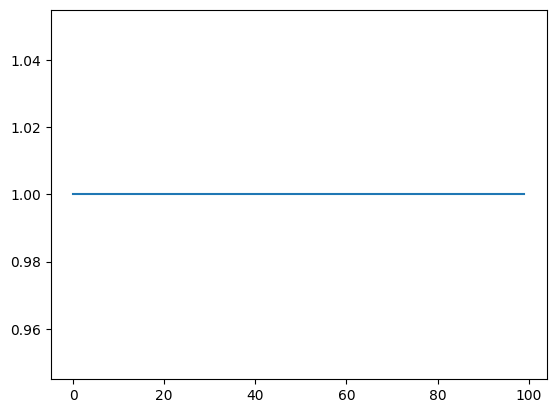

In [88]:
import matplotlib.pyplot as plt

N=100
X1 = list(map(lambda r:(r+1)/(r+1), range(N)))
X2 = list(map(lambda r:wtText[-1].get(r)/wtText[-1].get(wtText[-1].max()),
         sorted(wtText[-1], key=wtText[-1].get, reverse=True)[:N]))
X3 = list(map(lambda r:maText[-1].get(r)/maText[-1].get(maText[-1].max()),
         sorted(maText[-1], key=maText[-1].get, reverse=True)[:N]))


plt.plot(range(N), X1)
plt.plot(range(N), X2)
plt.plot(range(N), X3)

In [89]:
sum(list(map(lambda r:
             maText[-1].freq(r),
         sorted(maText[-1], key=maText[-1].get, reverse=True)[:60])))

0

In [90]:
maText[-1].most_common(60)

[]

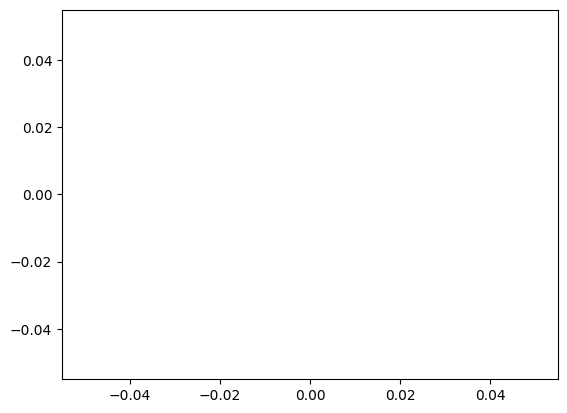

In [91]:
k = 24 #10 ~ 100
b = .63
plt.plot(range(len(maText))[1:],
         [t.B() for t in maText][1:])
plt.plot(range(len(maText))[1:],
         list(map(lambda n:k*n.B()**b, maText))[1:])

In [92]:
k*maText[-1].B()**b, maText[-1].N()

(0.0, 0)

In [104]:
sum

<function sum(iterable, /, start=0)>

In [107]:
gram1 = list()
gram2 = list()
gram3 = list()

for d in corpus:
    rst = list()
    for s in sent_tokenize(re.sub(r'\s+', ' ', d)):
        rst.extend(ma.morphs(s))
    gram1 += ngram(rst, 1)
    gram2 += ngram(rst, 2)
    gram3 += ngram(rst, 3)

In [108]:
len(gram1), len(gram2), len(gram3)

(0, 0, 0)

In [109]:
from collections import Counter

In [110]:
gram1_cnt = Counter(gram1)
gram2_cnt = Counter(gram2)
gram3_cnt = Counter(gram3)

In [111]:
#gram 1, 2 활용해서 특정 단어를 주면, 다음단어가 먼지 예측하게하는 기능
seed = '대통령'
gram1_cnt.get(('대통령',))

In [113]:
seed = '대통령'
gram1_cnt.get(('seed',))

list(map(lambda k:{k:gram2_cnt.get(k), 
              'prob':gram2_cnt.get(k)/gram1_cnt.get((seed,))},
    list(filter(lambda k:k[0] == seed, gram2_cnt))))

[]

### 함수 : key 로 시작하는 freq 찾는 함수

In [120]:
def find(key, gram):
    n = len(key)
    return [{k:gram.get(k)} for k in list(gram.keys()) 
            if k[:(n)] == key]

In [121]:
# (list(gram2_cnt.keys())[0])[:1]

In [122]:
find(('대통령', ), gram2_cnt, 2)

[]

In [123]:
# ABC 를 찾고 싶을때는
# C를 찾고 싶을때는 AB가 기븐,
# .... 하....

In [ ]:
def find(key, gram):
    n = len(key)
    #계산하기 편하게 tuple 로 바꾼 버전..
    return [(k:gram.get(k)) for k in list(gram.keys()) 
            if k[:(n)] == key]

In [125]:
seed = ('대통령',)
for i in range(10):
    given = find(seed, gram1_cnt)[0][1]
    candidates = list(map(lambda r:(r[0], r[1]/given),
                          find(seed, gram2_cnt)))
    best = list(sorted(candidates, key=lambda r:r[1],
                       reverse=True))[0]
    print(best)
    seed = best[0][-1]

IndexError: list index out of range

In [126]:
# NLU, NLG .... 

### 자동띄어쓰기 만들어보기..

In [127]:
'권 전 대법관은 대법관 재임 중이던 2020년 7월 당시 경기지사였던 더불어민주당 이재명 대표의 선거법 위반 사건 재판에서 무죄 취지 파기 환송 판결을 주도한 것으로 알려졌다.'.replace(' ','')

'권전대법관은대법관재임중이던2020년7월당시경기지사였던더불어민주당이재명대표의선거법위반사건재판에서무죄취지파기환송판결을주도한것으로알려졌다.'

In [128]:
ngram1 = Counter(ngram(' '.join(corpus), 1))
ngram2 = Counter(ngram(' '.join(corpus), 2))
ngram3 = Counter(ngram(' '.join(corpus), 3))
ngram4 = Counter(ngram(' '.join(corpus), 4))

In [130]:
#첫번째 글자 find 로 찾아보기 - ngram1,2, 3, 4에서
#만약 띄어쓰기가 아니면 다음 글자를 알려줌
#근데 우리나라는 1음절짜리 단어가 많아서 다 띄우라고 한다... 
# find(())

In [ ]:
#그래서 